In [1]:
import numpy as np
import pandas as pd

In [12]:
df_raw = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/ts_covid19_confirmed_global.csv')
df_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [15]:
df_raw = df_raw.dropna(axis=1)
df_raw.shape

(266, 191)

In [16]:
# Remove the unnecessary columns (Lat and Long)

df_raw = df_raw.drop(columns=['Lat', 'Long'])
df_raw.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,Albania,0,0,0,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,Algeria,0,0,0,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,Andorra,0,0,0,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,Angola,0,0,0,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


## 1. Group by the country and sum the total counts in Descending order.

In [21]:
df1 = df_raw.copy()
df1['Row_Totals'] = df1.sum(axis=1)
df1.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,Row_Totals
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35475,35526,35615,35727,35928,35981,36036,36157,36263,1936390
1,Albania,0,0,0,0,0,0,0,0,0,...,4090,4171,4290,4358,4466,4570,4637,4763,4880,196702
2,Algeria,0,0,0,0,0,0,0,0,0,...,23084,23691,24278,24872,25484,26159,26764,27357,27973,1179755
3,Andorra,0,0,0,0,0,0,0,0,0,...,880,884,884,889,889,897,897,897,907,94404
4,Angola,0,0,0,0,0,0,0,0,0,...,705,749,779,812,851,880,916,932,950,22662


In [25]:
# Subset the dataframe to contain only relevant fields

df1 = df1[["Country/Region", "Row_Totals"]]
df1.head()

,Country/Region,Row_Totals
0,Afghanistan,1936390
1,Albania,196702
2,Algeria,1179755
3,Andorra,94404
4,Angola,22662


In [30]:
# Group by the country and find the totals

df2 = df1.groupby(['Country/Region']).sum()
df2 = df2.sort_values('Row_Totals', ascending=False)
df2.reset_index(inplace=True)
df2

,Country/Region,Row_Totals
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
...,...,...
183,Saint Kitts and Nevis,1772
184,Holy See,1356
185,Papua New Guinea,1185
186,MS Zaandam,1070


In [32]:
print(f'The Country with Highest Covid Cases: {df2["Country/Region"][0]}. \nThe Country with Lowest Covid Cases: {df2["Country/Region"][187]}.')

The Country with Highest Covid Cases: US. 
The Country with Lowest Covid Cases: Western Sahara.


## Create a new data frame with two columns (date and the total sum of counts of the cases )and sort them in decreasing order.

In [62]:
df_date_qty = df_raw.copy()
df_date_qty.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,Albania,0,0,0,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,Algeria,0,0,0,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,Andorra,0,0,0,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,Angola,0,0,0,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [63]:
# Subset the dataframe to contain only dates and counts

df_date_qty = df_date_qty.drop(columns='Country/Region')
df_date_qty.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,0,0,0,0,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,0,0,0,0,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,0,0,0,0,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,0,0,0,0,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,0,0,0,0,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [64]:
# Pivot the dataframe to have dates as rows
df_date_qty = df_date_qty.T
df_date_qty['Date_Total'] = df_date_qty.sum(axis=1)
df_date_qty

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,Date_Total
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,654
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,941
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1434
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/23/20,35928,4466,25484,889,851,76,148027,36162,113,3640,...,13,4,2239,10,749,1654,340,7060,359,15511225
7/24/20,35981,4570,26159,897,880,82,153520,36613,113,3654,...,13,4,2258,10,860,1674,340,7104,359,15792390
7/25/20,36036,4637,26764,897,916,82,158334,36996,113,3668,...,13,4,2258,10,862,1674,340,7150,419,16047935
7/26/20,36157,4763,27357,897,932,82,162526,37317,113,3685,...,13,4,2262,10,863,1681,354,7192,505,16252541


In [65]:
df_date_qty = df_date_qty['Date_Total']
df_date_qty.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
Name: Date_Total, dtype: int64

In [61]:
df_date_qty = df_date_qty.sort_values(ascending=False)
df_date_qty

7/27/20    16481230
7/26/20    16252541
7/25/20    16047935
7/24/20    15792390
7/23/20    15511225
             ...   
1/26/20        2118
1/25/20        1434
1/24/20         941
1/23/20         654
1/22/20         555
Name: Date_Total, Length: 188, dtype: int64

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

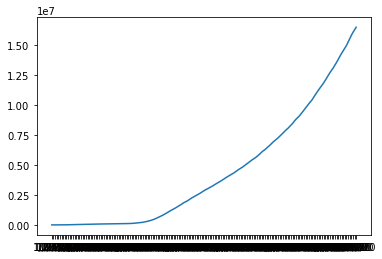

In [67]:
plt.plot(df_date_qty)